# Dataset Information:

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, 
and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the 
hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were 
standardized to have a mean of zero and a unit standard deviation.

Task Details

TASK 1
• Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency
room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

TASK 2
• Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency
room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or 
intensive care unit?

So here we will use classification regression to predict the results.

# 1-Data Exploration (Reading the data and attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [221]:
#lets import the covid19 hospiital dataset
covid19_brazil=pd.read_excel('covid19_clinical_dataset.xlsx')
print(covid19_brazil.shape)

(5644, 111)


In [143]:
#lets print the data
print(covid19_brazil.head())

        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                     

# 2-Exploratory Data Analysis (Exploring, Imputing, Cleaning & Visualizing)

In [153]:
#lets check is there any null value or not
covid19_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [145]:
#lets check how many are there null values
covid19_brazil.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [146]:
#lets check is there any duplicate data present in the dataset
covid19_brazil.duplicated().sum()

0

In [222]:
#lets see all the attributes whose data type is object
catdata=covid19_brazil.select_dtypes(include='object')
catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Patient ID                   5644 non-null   object
 1   SARS-Cov-2 exam result       5644 non-null   object
 2   Respiratory Syncytial Virus  1354 non-null   object
 3   Influenza A                  1354 non-null   object
 4   Influenza B                  1354 non-null   object
 5   Parainfluenza 1              1352 non-null   object
 6   CoronavirusNL63              1352 non-null   object
 7   Rhinovirus/Enterovirus       1352 non-null   object
 8   Coronavirus HKU1             1352 non-null   object
 9   Parainfluenza 3              1352 non-null   object
 10  Chlamydophila pneumoniae     1352 non-null   object
 11  Adenovirus                   1352 non-null   object
 12  Parainfluenza 4              1352 non-null   object
 13  Coronavirus229E              1352

In [223]:
#lets check how many are there null values
catdata.isnull().sum()

#so here all most more than 80% data are not available, so we will replace those values with "Missing"

Patient ID                        0
SARS-Cov-2 exam result            0
Respiratory Syncytial Virus    4290
Influenza A                    4290
Influenza B                    4290
Parainfluenza 1                4292
CoronavirusNL63                4292
Rhinovirus/Enterovirus         4292
Coronavirus HKU1               4292
Parainfluenza 3                4292
Chlamydophila pneumoniae       4292
Adenovirus                     4292
Parainfluenza 4                4292
Coronavirus229E                4292
CoronavirusOC43                4292
Inf A H1N1 2009                4292
Bordetella pertussis           4292
Metapneumovirus                4292
Parainfluenza 2                4292
Influenza B, rapid test        4824
Influenza A, rapid test        4824
Strepto A                      5312
Urine - Esterase               5584
Urine - Aspect                 5574
Urine - pH                     5574
Urine - Hemoglobin             5574
Urine - Bile pigments          5574
Urine - Ketone Bodies       

In [224]:
# Now lets put all those values "Missing"
for columns in catdata:
    print("Column Name:",columns)
    covid19_brazil[columns].fillna('Missing', inplace=True)
    print(covid19_brazil[columns].isnull().sum())
    print("\n")

Column Name: Patient ID
0


Column Name: SARS-Cov-2 exam result
0


Column Name: Respiratory Syncytial Virus
0


Column Name: Influenza A
0


Column Name: Influenza B
0


Column Name: Parainfluenza 1
0


Column Name: CoronavirusNL63
0


Column Name: Rhinovirus/Enterovirus
0


Column Name: Coronavirus HKU1
0


Column Name: Parainfluenza 3
0


Column Name: Chlamydophila pneumoniae
0


Column Name: Adenovirus
0


Column Name: Parainfluenza 4
0


Column Name: Coronavirus229E
0


Column Name: CoronavirusOC43
0


Column Name: Inf A H1N1 2009
0


Column Name: Bordetella pertussis
0


Column Name: Metapneumovirus
0


Column Name: Parainfluenza 2
0


Column Name: Influenza B, rapid test
0


Column Name: Influenza A, rapid test
0


Column Name: Strepto A
0


Column Name: Urine - Esterase
0


Column Name: Urine - Aspect
0


Column Name: Urine - pH
0


Column Name: Urine - Hemoglobin
0


Column Name: Urine - Bile pigments
0


Column Name: Urine - Ketone Bodies
0


Column Name: Urine - Nitrite
0




In [225]:
#Now convert all the categorical variable to numerical varibale using label encoder.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in catdata:
    covid19_brazil[columns] = le.fit_transform(covid19_brazil[columns])

In [226]:
#checking the values after label encoder
for columns in catdata:
    print("Column Name:",columns)
    #print(np.unique(combidata[columns], return_counts=True))
    print(covid19_brazil[columns].value_counts())
    print("\n")

Column Name: Patient ID
2047    1
469     1
4715    1
2668    1
621     1
       ..
5352    1
1258    1
3307    1
5356    1
0       1
Name: Patient ID, Length: 5644, dtype: int64


Column Name: SARS-Cov-2 exam result
0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64


Column Name: Respiratory Syncytial Virus
0    4290
2    1302
1      52
Name: Respiratory Syncytial Virus, dtype: int64


Column Name: Influenza A
0    4290
2    1336
1      18
Name: Influenza A, dtype: int64


Column Name: Influenza B
0    4290
2    1277
1      77
Name: Influenza B, dtype: int64


Column Name: Parainfluenza 1
0    4292
2    1349
1       3
Name: Parainfluenza 1, dtype: int64


Column Name: CoronavirusNL63
0    4292
2    1307
1      45
Name: CoronavirusNL63, dtype: int64


Column Name: Rhinovirus/Enterovirus
0    4292
2     973
1     379
Name: Rhinovirus/Enterovirus, dtype: int64


Column Name: Coronavirus HKU1
0    4292
2    1332
1      20
Name: Coronavirus HKU1, dtype: int64


Column Name: Pa

In [227]:
#lets see all the attributes whose data type is int
intdata=covid19_brazil.select_dtypes(include='int64')
intdata.info()

#so here there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   Patient age quantile                                   5644 non-null   int64
 1   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64
 2   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64
 3   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64
dtypes: int64(4)
memory usage: 176.5 KB


In [228]:
#lets see all the attributes whose data type is float
floatdata=covid19_brazil.select_dtypes(include='float')
floatdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 70 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Hematocrit                                        603 non-null    float64
 1   Hemoglobin                                        603 non-null    float64
 2   Platelets                                         602 non-null    float64
 3   Mean platelet volume                              599 non-null    float64
 4   Red blood Cells                                   602 non-null    float64
 5   Lymphocytes                                       602 non-null    float64
 6   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 7   Leukocytes                                        602 non-null    float64
 8   Basophils                                         602 non-null    float64
 9   Mean corpuscular he

In [229]:
#lets check how many are there null values
floatdata.isnull().sum()

#so here all most 90% data are not available, so we will replace those values with 0.0 for our analysis

Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
Mean platelet volume                  5045
Red blood Cells                       5042
                                      ... 
HCO3 (arterial blood gas analysis)    5617
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
Length: 70, dtype: int64

In [230]:
# Now lets put all those values with 0.0
for columns in floatdata:
    print("Column Name:",columns)
    covid19_brazil[columns].fillna(0.0, inplace=True)
    print(covid19_brazil[columns].isnull().sum())
    print("\n")

Column Name: Hematocrit
0


Column Name: Hemoglobin
0


Column Name: Platelets
0


Column Name: Mean platelet volume 
0


Column Name: Red blood Cells
0


Column Name: Lymphocytes
0


Column Name: Mean corpuscular hemoglobin concentration (MCHC)
0


Column Name: Leukocytes
0


Column Name: Basophils
0


Column Name: Mean corpuscular hemoglobin (MCH)
0


Column Name: Eosinophils
0


Column Name: Mean corpuscular volume (MCV)
0


Column Name: Monocytes
0


Column Name: Red blood cell distribution width (RDW)
0


Column Name: Serum Glucose
0


Column Name: Mycoplasma pneumoniae
0


Column Name: Neutrophils
0


Column Name: Urea
0


Column Name: Proteina C reativa mg/dL
0


Column Name: Creatinine
0


Column Name: Potassium
0


Column Name: Sodium
0


Column Name: Alanine transaminase
0


Column Name: Aspartate transaminase
0


Column Name: Gamma-glutamyltransferase 
0


Column Name: Total Bilirubin
0


Column Name: Direct Bilirubin
0


Column Name: Indirect Bilirubin
0


Column Name: Alka

In [231]:
#again lets check is there any null value or not after imputing all the values
covid19_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int32(37), int64(4)
memory usage: 4.0 MB


In [232]:
#again lets check how many are there null values
covid19_brazil.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
                                                        ..
HCO3 (arterial blood gas analysis)                       0
pO2 (arterial blood gas analysis)                        0
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
Length: 111, dtype: int64

In [234]:
#so our final dataset is
covid19_brazil_hospital=covid19_brazil
print(covid19_brazil_hospital.shape)

(5644, 111)


# TASK1: Predict confirmed COVID-19 cases among suspected cases. 
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the 
emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

In [235]:
#so for our analysis we can drop the Patient ID attribute from dataset

covid19_brazil_cnf=covid19_brazil_hospital.drop(columns=['Patient ID'],axis=1)
print(covid19_brazil_cnf.shape)

(5644, 110)


In [236]:
#Here the dataset contain many variables which are having correlated to eachother.
#so multicolinearity will increase the model variance. 
#so we will use Dimensionality Reduction method i.e.utilizing PCA can provide an optimal set of orthogonal features. 
#Let's adopt the criterion in which we select those principal components responsible to explain 
#more than a unit variance ("eigenvalue one criterion").

#first we will separate both input and target attributes here

dx=covid19_brazil_cnf.drop(columns=['SARS-Cov-2 exam result'],axis=1)
y=covid19_brazil_cnf[['SARS-Cov-2 exam result']]

print(dx.shape)
print(y.shape)

(5644, 109)
(5644, 1)


In [180]:
#scaling the input variables using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,5))
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

Amount of variance: [7.49861625e+01 2.44723411e+00 1.82959809e+00 1.66157552e+00
 3.40113298e-01 2.96075882e-01 2.57087977e-01 2.48206424e-01
 2.03577455e-01 1.54834981e-01 1.27278401e-01 1.05257438e-01
 1.00024446e-01 7.89419350e-02 7.57871478e-02 7.14629307e-02
 6.33995004e-02 6.17776151e-02 5.60829736e-02 5.28042379e-02]
Sum of the variance: 83.22
Percentage of variance: [8.91092601e-01 2.90815283e-02 2.17418957e-02 1.97452117e-02
 4.04171161e-03 3.51839618e-03 3.05508625e-03 2.94954297e-03
 2.41919786e-03 1.83997022e-03 1.51250361e-03 1.25081910e-03
 1.18863323e-03 9.38100736e-04 9.00611051e-04 8.49224532e-04
 7.53403346e-04 7.34129790e-04 6.66457933e-04 6.27495316e-04]
Sum of the percentage of variance: 0.99


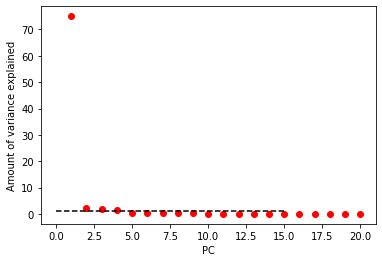

(5644, 20)


In [181]:
#lets apply the PCA technique

from sklearn.decomposition import PCA

c = 20
pca = PCA(n_components = c)
x = pca.fit_transform(x)


print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,15), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(x.shape)

array([[-4.87086254e+00, -1.06981011e+00, -1.26849923e-01, ...,
        -3.85068488e-03,  7.67642574e-03, -8.50058630e-03],
       [ 1.52371118e+01, -7.66487565e-01,  1.03790192e+00, ...,
         2.96164452e-01,  5.60960938e-02,  1.89891786e-01],
       [-4.86724077e+00,  1.28877110e-01, -3.28705107e-01, ...,
         7.36967051e-03,  2.20585733e-03,  5.05466661e-03],
       ...,
       [-4.86434336e+00,  1.08782688e+00, -4.90189254e-01, ...,
         1.63459548e-02, -2.17059739e-03,  1.58988689e-02],
       [-4.73551525e+00, -5.06617664e-01,  1.09463476e+01, ...,
        -1.70748515e-01, -1.26703552e-01, -8.58700784e-02],
       [-4.87491664e+00, -2.50740346e+00,  9.05841303e-02, ...,
         3.52423870e-01, -4.62554929e-01,  3.12742513e-01]])

In [183]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4515, 20) (1129, 20)
(4515, 1) (1129, 1)


In [184]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [189]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
#models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [186]:
#lets import all the classification outputs
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [192]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.9087688219663419


Cross Value Score: 0.9025528776752652


roc_auc_score: 0.5355678891428156


Classification Report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.73      0.07      0.13       108

    accuracy                           0.91      1129
   macro avg       0.82      0.54      0.54      1129
weighted avg       0.89      0.91      0.87      1129



Confusion Matrix:
 [[1018    3]
 [ 100    8]]


************************ SVC **********************


SVC(C=1.0, break_ties=False, cache_s

In [193]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score  \
0          LogisticRegression       90.876882          90.255288   
1                         SVC       90.256864          90.184303   
2        KNeighborsClassifier       90.434012          89.032794   
3      DecisionTreeClassifier       90.434012          89.227547   
4                  GaussianNB       89.725421          87.721270   
5      RandomForestClassifier       90.522586          90.308354   
6          AdaBoostClassifier       90.345438          90.148905   
7  GradientBoostingClassifier       90.522586          90.574186   

   Roc_Auc_Curve  
0      53.556789  
1      50.730040  
2      52.897940  
3      54.553905  
4      54.162132  
5      51.290946  
6      51.606994  
7      52.946911  


Accuracy Score is: 0.9202834366696191
Cross Value Score: 0.9025528776752652
ROC_AUC Score: 0.5406208243396031
Confusion Matix:
 [[1031    4]
 [  86    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1035
           1       0.67      0.09      0.15        94

    accuracy                           0.92      1129
   macro avg       0.79      0.54      0.55      1129
weighted avg       0.90      0.92      0.89      1129

AxesSubplot(0.125,0.808774;0.62x0.0712264)


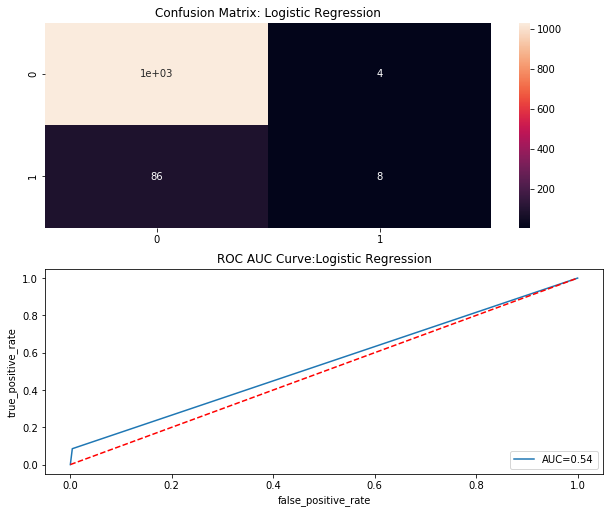

In [201]:
#So here LogisticRegression is the best model with 'random_state': 42

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
lgreg=LogisticRegression(random_state=42)
lgreg.fit(x_train,y_train)
pred_lg=lgreg.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_lg))
print('Cross Value Score:', cross_val_score(lgreg, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_lg)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_lg))
print('Classification Report:\n', classification_report(y_test,pred_lg))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_lg)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix: Logistic Regression')
print(sns.heatmap(
cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve:Logistic Regression')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')  

In [202]:
#lets see the actual churn and predicted churn
print('Actual confirmed COVID-19 cases:\n',y_test)
print('Predicted confirmed COVID-19 cases:\n',pred_lg)

Actual confirmed COVID-19 cases:
       SARS-Cov-2 exam result
5032                       0
4338                       0
3590                       0
201                        0
803                        0
...                      ...
352                        0
907                        0
490                        0
2235                       0
2603                       0

[1129 rows x 1 columns]
Predicted confirmed COVID-19 cases:
 [0 0 0 ... 0 0 0]


In [203]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lgreg,'lgreg_covid19_prediction.obj')

['lgreg_covid19_prediction.obj']

In [204]:
# load the model from the file
covid19_prediction_from_joblib=joblib.load('lgreg_covid19_prediction.obj')

In [205]:
#Use the loaded model to make predictions against test data
covid19_prediction_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

# Task1 Conclusion:
    
So here 'LogisticRegression Model' is the best model out of all model tested above and by looking this we can conclude
that our model is predicting around 93% of correct results for predicting confirmed COVID-19 cases based on the result
of SARS-Cov-2.

# TASK2:Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases. 

Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency
room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or 
intensive care unit?

In [237]:
#lets see the data
print(covid19_brazil_hospital.shape)
print(covid19_brazil_hospital.head())

(5644, 111)
   Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0        1588                    13                       0   
1         451                    17                       0   
2        3669                     8                       0   
3        5457                     5                       0   
4        4843                    15                       0   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                 

In [244]:
#so for our analysis we can drop the Patient ID attribute from dataset
covid19_brazil_adm=covid19_brazil_hospital.drop(columns=['Patient ID'],axis=1)
print(covid19_brazil_adm.shape)

(5644, 110)


In [245]:
#so here as we are going to predict the admission to general ward/semi-intensive unit/intensive care unit
#first lets see these attributes data
covid19_brazil_adm[['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)']]

,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
5639,0,0,0
5640,0,0,0
5641,0,0,0
5642,0,0,0


In [246]:
#so first convert all these 3 columns to object datatype for our analysis
covid19_brazil_adm["Patient addmited to regular ward (1=yes, 0=no)"] = covid19_brazil_adm["Patient addmited to regular ward (1=yes, 0=no)"].astype(str)
covid19_brazil_adm["Patient addmited to semi-intensive unit (1=yes, 0=no)"] = covid19_brazil_adm["Patient addmited to semi-intensive unit (1=yes, 0=no)"].astype(str)
covid19_brazil_adm["Patient addmited to intensive care unit (1=yes, 0=no)"] = covid19_brazil_adm["Patient addmited to intensive care unit (1=yes, 0=no)"].astype(str)

In [247]:
#so to build the model for admission to general ward/semi-intensive unit/intensive care unit, 
#we will mearge all the 3 columns and then encode using level encoder
covid19_brazil_adm["admission to ward"] = covid19_brazil_adm["Patient addmited to regular ward (1=yes, 0=no)"] +covid19_brazil_adm["Patient addmited to semi-intensive unit (1=yes, 0=no)"]+covid19_brazil_adm["Patient addmited to intensive care unit (1=yes, 0=no)"]

In [253]:
#lets print the size of the dataset
print(covid19_brazil_adm.shape)

(5644, 111)


In [255]:
#lets see data in the new target column data
print(covid19_brazil_adm['admission to ward'].head())

0    000
1    000
2    000
3    000
4    000
Name: admission to ward, dtype: object


In [256]:
#Now convert this categorical variable to numerical varibale using label encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
covid19_brazil_adm['admission to ward'] = le.fit_transform(covid19_brazil_adm['admission to ward'])

In [260]:
#lets see data in the new target column data
print(covid19_brazil_adm['admission to ward'].head())
print(covid19_brazil_adm['admission to ward'].value_counts())

0    0
1    0
2    0
3    0
4    0
Name: admission to ward, dtype: int32
0    5474
3      79
2      50
1      41
Name: admission to ward, dtype: int64


In [262]:
#lets separe the input and target varibale
#also we will going to drop 'Patient addmited to regular ward (1=yes, 0=no)',
#'Patient addmited to semi-intensive unit (1=yes, 0=no)',
#'Patient addmited to intensive care unit (1=yes, 0=no)' columns from the dataset

dx=covid19_brazil_adm.drop(columns=['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)','admission to ward'],axis=1)
y=covid19_brazil_adm[['admission to ward']]

print(dx.shape)
print(y.shape)

(5644, 107)
(5644, 1)


In [263]:
#scaling the input variables using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,5))
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

Amount of variance: [7.49753036e+01 2.55502794e+00 2.12896961e+00 1.81102564e+00
 1.65993792e+00 2.99181392e-01 2.54956205e-01 1.75742903e-01
 1.52809492e-01 1.08239558e-01 1.00682257e-01 8.13601664e-02
 7.62789038e-02 7.18350627e-02 6.42416498e-02 6.17544211e-02
 6.08266956e-02 5.35615590e-02 4.97415600e-02 4.80663913e-02]
Sum of the variance: 84.79
Percentage of variance: [8.75536793e-01 2.98367710e-02 2.48614028e-02 2.11485583e-02
 1.93842059e-02 3.49374133e-03 2.97729422e-03 2.05226749e-03
 1.78445870e-03 1.26398575e-03 1.17573409e-03 9.50097109e-04
 8.90759804e-04 8.38866098e-04 7.50192734e-04 7.21147701e-04
 7.10314029e-04 6.25474167e-04 5.80865482e-04 5.61303416e-04]
Sum of the percentage of variance: 0.99


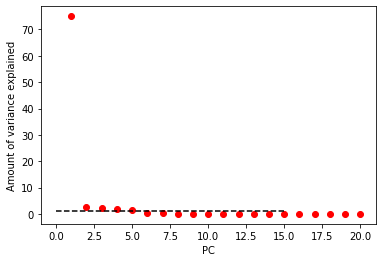

(5644, 20)


In [264]:
#lets apply the PCA technique

from sklearn.decomposition import PCA

c = 20
pca = PCA(n_components = c)
x = pca.fit_transform(x)


print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,15), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(x.shape)

In [265]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4515, 20) (1129, 20)
(4515, 1) (1129, 1)


In [266]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [267]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
#models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [268]:
#lets import all the classification outputs
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [270]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.9689991142604074


Cross Value Score: 0.9697025042364903


Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1090
           1       1.00      0.08      0.14        13
           2       0.50      0.09      0.15        11
           3       0.50      0.13      0.21        15

    accuracy                           0.97      1129
   macro avg       0.74      0.33      0.37      1129
weighted avg       0.96      0.97      0.96      1129



Confusion Matrix:
 [[1090    0    0    0]
 [   9    1    1    2]
 

In [271]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score
0          LogisticRegression       96.899911          96.970250
1                         SVC       96.545616          96.970219
2        KNeighborsClassifier       96.634190          96.987950
3      DecisionTreeClassifier       96.102746          95.730057
4                  GaussianNB       86.979628          86.448786
5      RandomForestClassifier       96.368468          96.757641
6          AdaBoostClassifier       96.722764          96.350342
7  GradientBoostingClassifier       96.457042          96.562857


Accuracy Score is: 0.9689991142604074
Cross Value Score: 0.9697025042364903
Confusion Matix:
 [[1093    1    1    0]
 [   7    1    1    1]
 [  11    2    0    1]
 [   9    1    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1095
           1       0.20      0.10      0.13        10
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        10

    accuracy                           0.97      1129
   macro avg       0.29      0.27      0.28      1129
weighted avg       0.95      0.97      0.96      1129

AxesSubplot(0.125,0.808774;0.62x0.0712264)


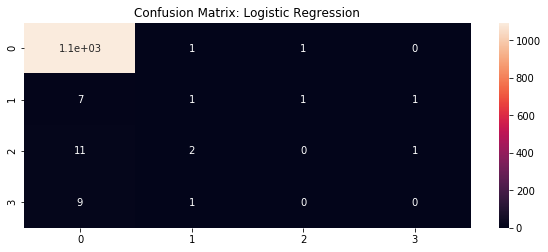

In [276]:
#So here LogisticRegression is the best model with 'random_state': 42

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
lgreg=LogisticRegression(random_state=42)
lgreg.fit(x_train,y_train)
pred_lg=lgreg.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_lg))
print('Cross Value Score:', cross_val_score(lgreg, x,y,cv=10,scoring='accuracy').mean())
#false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_lg)
#print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_lg))
print('Classification Report:\n', classification_report(y_test,pred_lg))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_lg)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix: Logistic Regression')
print(sns.heatmap(
cm,annot=True)) 

In [277]:
#lets see the actual churn and predicted churn
print('Actual Patient Addmited to Ward Class:\n',y_test)
print('Predicted Patient Addmited to Ward Class:\n',pred_lg)

Actual Patient Addmited to Ward Class:
       admission to ward
622                   0
1210                  0
2232                  0
4359                  0
3218                  0
...                 ...
650                   0
2314                  0
5315                  0
266                   0
190                   0

[1129 rows x 1 columns]
Predicted Patient Addmited to Ward Class:
 [0 0 0 ... 0 0 0]


In [278]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lgreg,'covid19_admission_ward_prediction.obj')

['covid19_admission_ward_prediction.obj']

In [279]:
# load the model from the file
covid19_admission_ward_prediction_from_joblib=joblib.load('covid19_admission_ward_prediction.obj')

In [280]:
#Use the loaded model to make predictions against test data
covid19_admission_ward_prediction_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

# Task2 Conclusion:
    
So here again 'LogisticRegression Model' is the best model out of all model tested above and by looking this we can 
conclude that our model is predicting around 97% of correct results for predicting admission to general ward or  
semi-intensive unit or intensive care unit among confirmed COVID-19 cases.